In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<div class="alert alert-block alert-info"> <h2> Scikit-Learn  </h2> </div>

<font class="alert alert-block alert-info"> Import Scikit-Learn 的 Datasets </font>

In [2]:
from sklearn import datasets

<font class="alert alert-block alert-info"> Dataset </font>
<font class="alert alert-block alert-info"> iris </font>

In [3]:
iris = datasets.load_iris()

<font class="alert alert-block alert-info"> iris </font>
<font class="alert alert-block alert-info"> type </font>

In [4]:
type(iris)

sklearn.datasets.base.Bunch

<font class="alert alert-block alert-info"> iris </font>
<font class="alert alert-block alert-info"> keys </font>

In [5]:
iris.keys()

dict_keys(['DESCR', 'data', 'target_names', 'feature_names', 'target'])

<font class="alert alert-block alert-info"> iris </font>
<font class="alert alert-block alert-info"> data </font>
<font class="alert alert-block alert-info"> feature_names </font>

In [6]:
iris.data.shape

(150, 4)

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

<font class="alert alert-block alert-info"> iris </font>
<font class="alert alert-block alert-info"> target </font>
<font class="alert alert-block alert-info"> target_names </font>

In [8]:
iris.target.shape

(150,)

In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

<font class="alert alert-block alert-info"> iris </font>
<font class="alert alert-block alert-info"> Data Prepare </font>

In [10]:
iris_df = pd.DataFrame( iris.data )
iris_df.columns = iris.feature_names
iris_df['species'] = iris.target_names[iris.target]

In [11]:
#iris.target_names[iris.target]

<font class="alert alert-block alert-info"> iris </font>
<font class="alert alert-block alert-info"> Exploratory Data Analysis </font>

In [12]:
iris_df.shape

(150, 5)

In [13]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [15]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
iris_df["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

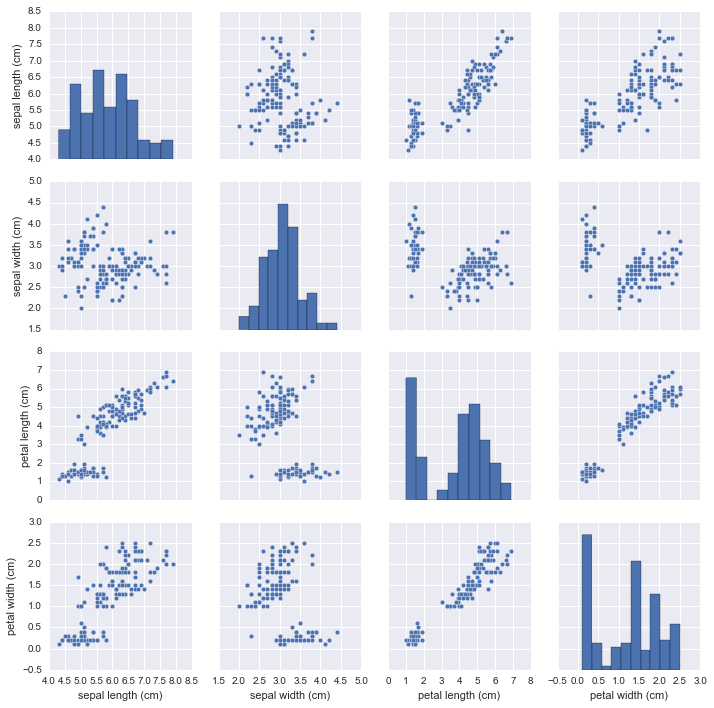

In [17]:
sns.pairplot(iris_df)

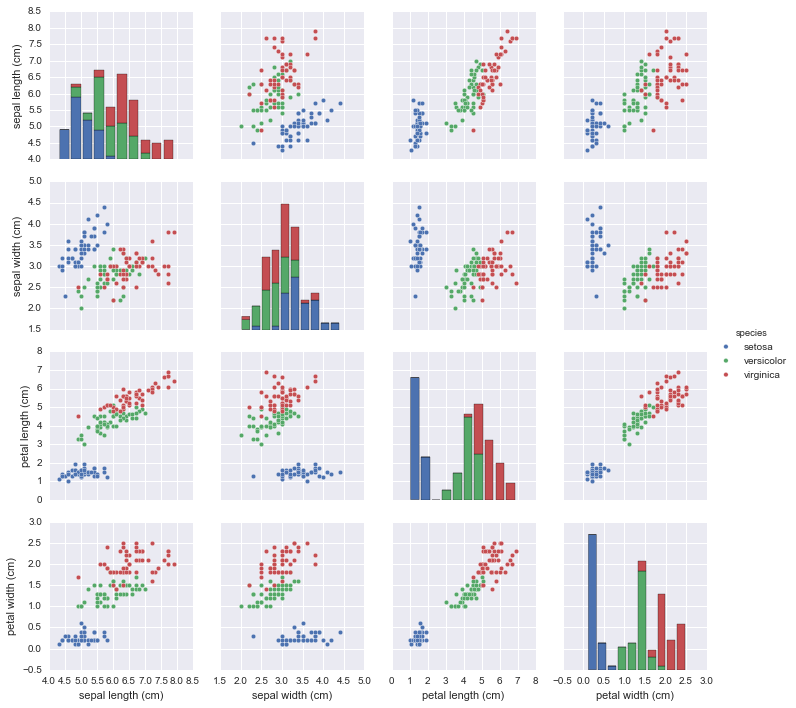

In [18]:
sns.pairplot(iris_df ,hue='species')

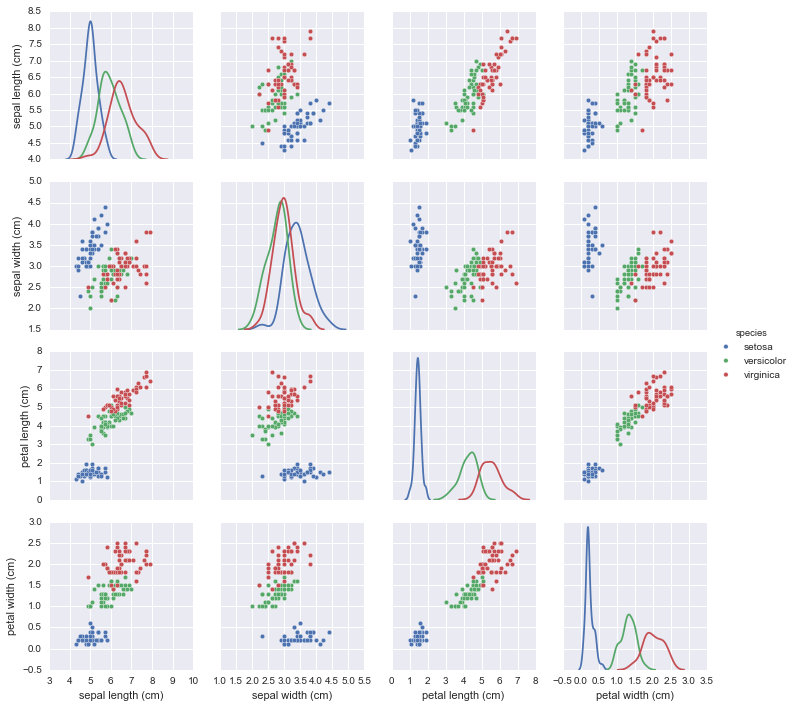

In [19]:
sns.pairplot(iris_df ,hue='species',diag_kind="kde")

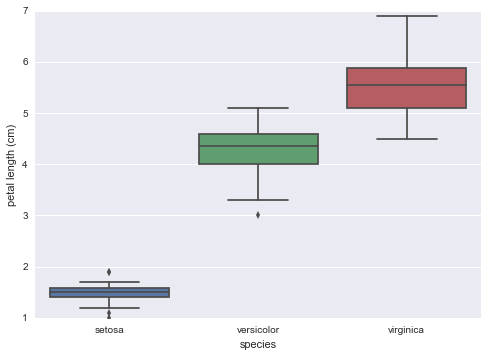

In [20]:
sns.boxplot(x="species", y="petal length (cm)", data=iris_df)

<div class="alert alert-block alert-warning"> <h3> Choose Data
</h3> </div>

In [21]:
X = iris_df.ix[:, ['petal length (cm)','petal width (cm)']]
y = iris.target

In [22]:
np.set_printoptions(precision = 5, suppress = True)
print("Mean : ",X.values.mean(axis=0))
print("Std : ",X.values.std(axis=0))
print("Max : ",X.values.max(axis=0))
print("Min : ",X.values.min(axis=0))

Mean :  [ 3.75867  1.19867]
Std :  [ 1.75853  0.76061]
Max :  [ 6.9  2.5]
Min :  [ 1.   0.1]


<div class="alert alert-block alert-info"> <h3> Preprocessing
</h3> </div>

In [23]:
from sklearn import preprocessing

<font class="alert alert-block alert-info"> Standard </font>

In [24]:
standard = preprocessing.StandardScaler()
standard.fit(X)
X_s = standard.transform(X)

In [25]:
print("Mean : ",X_s.mean(axis=0))
print("Std : ",X_s.std(axis=0))
print("Max : ",X_s.max(axis=0))
print("Min : ",X_s.min(axis=0))

Mean :  [-0. -0.]
Std :  [ 1.  1.]
Max :  [ 1.78634  1.7109 ]
Min :  [-1.56874 -1.44445]


<font class="alert alert-block alert-info"> MinMax </font>

In [26]:
minmax = preprocessing.MinMaxScaler()
minmax.fit(X)
X_m = minmax.transform(X)

In [27]:
print("Mean : ",X_m.mean(axis=0))
print("Std : ",X_m.std(axis=0))
print("Max : ",X_m.max(axis=0))
print("Min : ",X_m.min(axis=0))

Mean :  [ 0.46757  0.45778]
Std :  [ 0.29806  0.31692]
Max :  [ 1.  1.]
Min :  [ 0.  0.]


<font class="alert alert-block alert-info"> Normalize </font>

In [28]:
normal = preprocessing.Normalizer()
normal.fit(X)
X_n = normal.transform(X)

In [29]:
print("Mean : ",X_n.mean(axis=0))
print("Std : ",X_n.std(axis=0))
print("Max : ",X_n.max(axis=0))
print("Min : ",X_n.min(axis=0))

Mean :  [ 0.95911  0.26772]
Std :  [ 0.02265  0.08904]
Max :  [ 0.99779  0.4258 ]
Min :  [ 0.90482  0.06652]


<div class="alert alert-block alert-info"> <h3> Train data ＆ Test data
</h3> </div>

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
#from sklearn.cross_validation import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

<div class="alert alert-block alert-info"> <h3> Logistic Regression
</h3> </div>

<font class="alert alert-block alert-warning"> Sigmoid function </font>

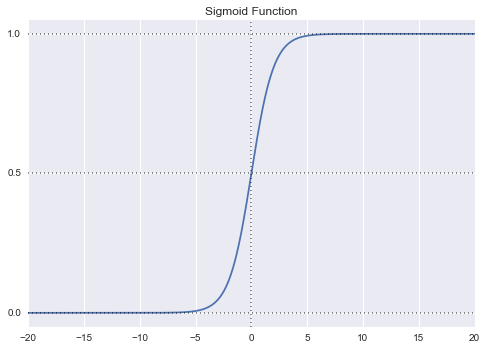

In [33]:
def SigmoidFunc(x):
    return 1 / (1 + np.exp(-x))

Sigmoid_x = np.arange(-20, 20, 0.01)
Sigmoid_y = SigmoidFunc(Sigmoid_x)
plt.plot(Sigmoid_x, Sigmoid_y)
plt.axvline(0, ls='dotted', color='black', alpha=0.5)
plt.axhline(y=0, ls='dotted', color='black', alpha=0.5)
plt.axhline(y=0.5, ls = 'dotted', color='black', alpha=0.5)
plt.axhline(y=1, ls='dotted', color='black', alpha=0.5)
plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.05, 1.05)
plt.title("Sigmoid Function")
plt.show()

<font class="alert alert-block alert-info"> Model(Logistic Regression) </font>
<font class="alert alert-block alert-info"> Import module </font>

In [34]:
from sklearn.linear_model import LogisticRegression

<font class="alert alert-block alert-info"> Model(Logistic Regression) </font>
<font class="alert alert-block alert-info"> Use Logistic Regression </font>

In [35]:
logit = LogisticRegression()

<font class="alert alert-block alert-info"> Model(Logistic Regression) </font>
<font class="alert alert-block alert-info"> Training Data </font>

In [36]:
logit.fit( X_train, y_train )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

<font class="alert alert-block alert-info"> Model(Logistic Regression) </font>
<font class="alert alert-block alert-info"> Predict </font>

In [37]:
y_logit_predict = logit.predict(X_test)

In [38]:
pd.DataFrame( list(zip(y_test,y_logit_predict)), columns=['Measured','Predicted'] )

,Measured,Predicted
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0
5,2,2
6,0,0
7,1,2
8,1,2
9,1,2


In [39]:
pd.DataFrame( list(zip(iris.target_names[y_test],
                       iris.target_names[y_logit_predict])), columns=['Measured','Predicted'] )

,Measured,Predicted
0,virginica,virginica
1,versicolor,versicolor
2,setosa,setosa
3,virginica,virginica
4,setosa,setosa
5,virginica,virginica
6,setosa,setosa
7,versicolor,virginica
8,versicolor,virginica
9,versicolor,virginica


<font class="alert alert-block alert-warning"> Check probability </font>

In [40]:
print(iris.target_names)
print(logit.predict_proba(X_test.values[0, :].reshape(1, 2)))
print(logit.predict_proba(X_test.values[1, :].reshape(1, 2)))
print(logit.predict_proba(X_test.values[2, :].reshape(1, 2)))

['setosa' 'versicolor' 'virginica']
[[ 0.00368  0.20336  0.79297]]
[[ 0.14155  0.53555  0.3229 ]]
[[ 0.72601  0.23859  0.0354 ]]


<font class="alert alert-block alert-info"> Model(Logistic Regression) </font>
<font class="alert alert-block alert-info"> Accuracy </font>

In [41]:
from sklearn.metrics import accuracy_score
print('Accuracy:',accuracy_score(y_test, y_logit_predict))

Accuracy: 0.688888888889


<div class="alert alert-block alert-warning"> <h3> Decision boundary
</h3> </div>

In [42]:
from matplotlib.colors import ListedColormap
def DecisionBoundary_plot(X, y, method, h=.02):
    markers = ('o', '*', '^') 
    colors = ('yellow', 'magenta', 'cyan') 
    colormap = ListedColormap(colors[:len(np.unique(y))])

    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = method.predict(np.array([xx.ravel(), yy.ravel()]).T)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.2, cmap=colormap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    for ix, lab in enumerate(np.unique(y)):
        spec = iris.target_names[lab]
        plt.scatter( x = X[y==lab,0], y = X[y==lab,1],
                     c=colormap(ix), marker=markers[ix], label=spec)  

<font class="alert alert-block alert-info"> Model(Logistic Regression) </font>
<font class="alert alert-block alert-info"> Plot (Decision boundary) </font>

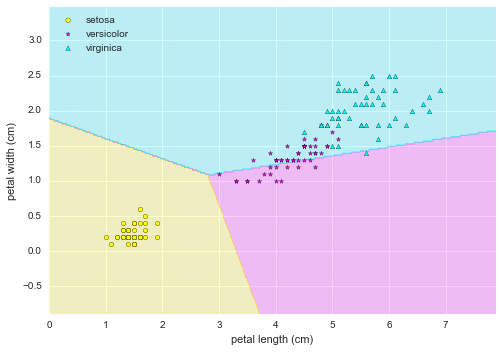

In [43]:
DecisionBoundary_plot(X=X.values, y=y, method=logit)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(loc = 'upper left')
plt.show()

<div class="alert alert-block alert-danger"> <h3> 利用經過StandardScaler轉換後的資料，建立Logistic Regression Model，並比較Accuracy
</h3> </div>

In [44]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y, test_size = 0.3, random_state = 0)

In [45]:
logit_s = LogisticRegression()
logit_s.fit( X_train_s, y_train_s )
y_logit_predict_s = logit_s.predict(X_test_s)

print('Accuracy(Standard):',accuracy_score(y_test_s, y_logit_predict_s))

Accuracy(Standard): 0.8


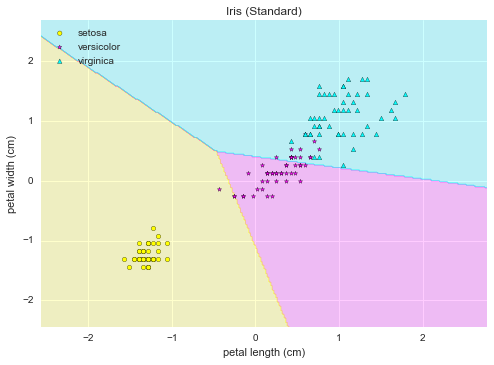

In [46]:
DecisionBoundary_plot(X=X_s, y=y, method=logit_s)
plt.title('Iris (Standard)')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(loc = 'upper left')
plt.show()

<div class="alert alert-block alert-info"> <h3> K-Nearest Neighbors </h3> </div>

<font class="alert alert-block alert-info"> Model(KNN) </font>
<font class="alert alert-block alert-info"> Import module </font>

In [47]:
from sklearn.neighbors import KNeighborsClassifier

<font class="alert alert-block alert-info"> Model(KNN) </font>
<font class="alert alert-block alert-info"> Use KNeighborsClassifier </font>

In [48]:
knn = KNeighborsClassifier()

<font class="alert alert-block alert-info"> Model(KNN) </font>
<font class="alert alert-block alert-info"> Training Data </font>

In [49]:
knn.fit(X_train_s, y_train_s)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

<font class="alert alert-block alert-info"> Model(KNN) </font>
<font class="alert alert-block alert-info"> Predict </font>

In [50]:
y_knn_predict = knn.predict(X_test_s)

In [51]:
pd.DataFrame( list(zip(iris.target_names[y_test_s],
                       iris.target_names[y_knn_predict])), columns=['Measured','Predicted'] )

,Measured,Predicted
0,virginica,virginica
1,versicolor,versicolor
2,setosa,setosa
3,virginica,virginica
4,setosa,setosa
5,virginica,virginica
6,setosa,setosa
7,versicolor,versicolor
8,versicolor,versicolor
9,versicolor,versicolor


<font class="alert alert-block alert-info"> Model(SVM) </font>
<font class="alert alert-block alert-info"> Accuracy </font>

In [52]:
print('Accuracy:',accuracy_score(y_test_s, y_knn_predict))

Accuracy: 1.0


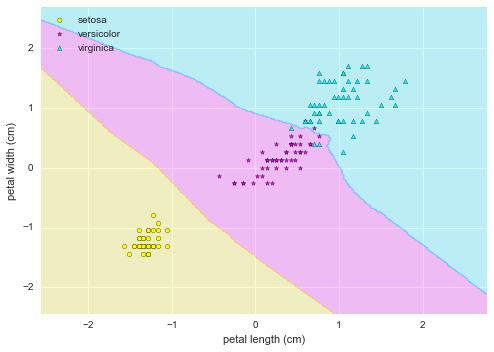

In [53]:
DecisionBoundary_plot(X=X_s, y=y, method=knn)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(loc = 'upper left')
plt.show()

<div class="alert alert-block alert-info"> <h3> Support Vector Machine 
</h3> </div>

<font class="alert alert-block alert-info"> Model(SVM) </font>
<font class="alert alert-block alert-info"> Import module </font>

In [54]:
from sklearn.svm import SVC

<font class="alert alert-block alert-info"> Model(SVM) </font>
<font class="alert alert-block alert-info"> Use SVC </font>

In [55]:
svm = SVC(kernel = 'rbf', random_state = 0, gamma = 0.2)

<font class="alert alert-block alert-info"> Model(SVM) </font>
<font class="alert alert-block alert-info"> Training Data </font>

In [56]:
svm.fit( X_train, y_train )

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.2, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

<font class="alert alert-block alert-info"> Model(SVM) </font>
<font class="alert alert-block alert-info"> Predict </font>

In [57]:
y_svm_predict = svm.predict(X_test)

In [58]:
pd.DataFrame( list(zip(iris.target_names[y_test],
                       iris.target_names[y_svm_predict])), columns=['Measured','Predicted'] )

,Measured,Predicted
0,virginica,virginica
1,versicolor,versicolor
2,setosa,setosa
3,virginica,virginica
4,setosa,setosa
5,virginica,virginica
6,setosa,setosa
7,versicolor,versicolor
8,versicolor,versicolor
9,versicolor,versicolor


<font class="alert alert-block alert-info"> Model(SVM) </font>
<font class="alert alert-block alert-info"> Accuracy </font>

In [59]:
from sklearn.metrics import accuracy_score
print('Accuracy:',accuracy_score(y_test, y_svm_predict))

Accuracy: 0.977777777778


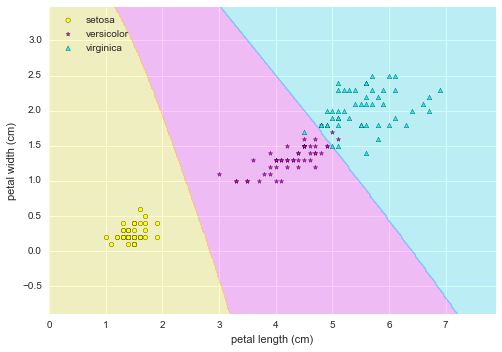

In [60]:
DecisionBoundary_plot(X=X.values, y=y, method=svm)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(loc = 'upper left')
plt.show()

<div class="alert alert-block alert-danger"> <h3> 利用經過StandardScaler轉換後的資料，建立SVM Model，並比較Accuracy
</h3> </div>

In [61]:
svm_s = SVC(kernel = 'rbf', random_state = 0, gamma = 0.2)
svm_s.fit( X_train_s, y_train_s )
y_svm_predict_s = svm_s.predict(X_test_s)

print('Accuracy:',accuracy_score(y_test_s, y_svm_predict_s))

Accuracy: 0.977777777778


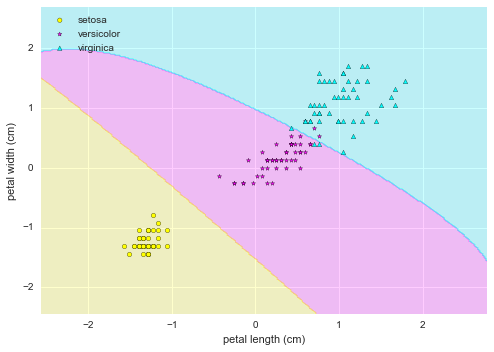

In [62]:
DecisionBoundary_plot(X=X_s, y=y, method=svm_s)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(loc = 'upper left')
plt.show()

<div class="alert alert-block alert-warning"> <h3> SVM (Linear)
</h3> </div>

In [63]:
svm_lin_s = SVC(kernel = 'linear', random_state = 0, gamma = 0.2)
svm_lin_s.fit( X_train_s, y_train_s )
y_svm_lin_predict_s = svm_s.predict(X_test_s)

print('Accuracy:',accuracy_score(y_test_s, y_svm_lin_predict_s))

Accuracy: 0.977777777778


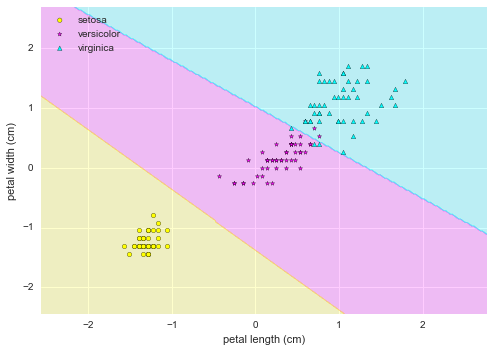

In [64]:
DecisionBoundary_plot(X=X_s, y=y, method=svm_lin_s)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(loc = 'upper left')
plt.show()

<div class="alert alert-block alert-warning"> <h3> SVM (bigger gamma)
</h3> </div>

In [65]:
svm_s_10 = SVC(kernel = 'rbf', random_state = 0, gamma = 10 )
svm_s_10.fit( X_train_s, y_train_s )
y_svm_predict_s_10 = svm_s_10.predict(X_test_s)

print('Accuracy:',accuracy_score(y_test_s, y_svm_predict_s_10))

Accuracy: 1.0


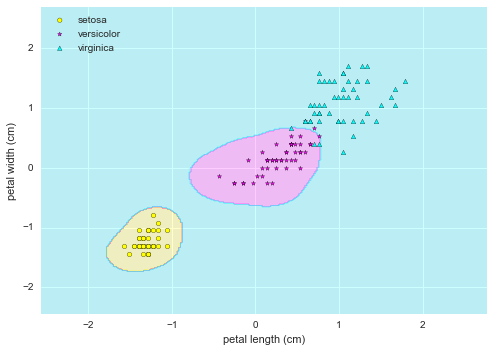

In [66]:
DecisionBoundary_plot(X=X_s, y=y, method=svm_s_10)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(loc = 'upper left')
plt.show()

In [67]:
svm_s_200 = SVC(kernel = 'rbf', random_state = 0, gamma = 200 )
svm_s_200.fit( X_train_s, y_train_s )
y_svm_predict_s_200 = svm_s_200.predict(X_test_s)

print('Accuracy:',accuracy_score(y_test_s, y_svm_predict_s_200))

Accuracy: 0.755555555556


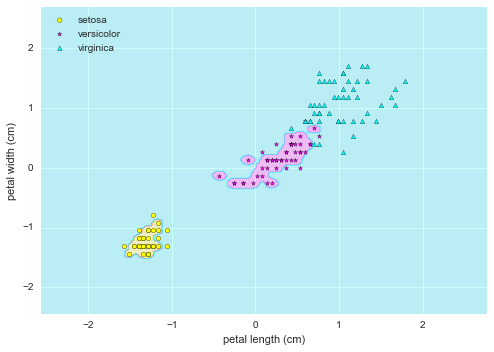

In [68]:
DecisionBoundary_plot(X=X_s, y=y, method=svm_s_200)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(loc = 'upper left')
plt.show()